# IPL Data Analysis 

Being a cricket fan and a data crazy guy, I always wondered how these IPL data guys always came up with all the interesting stats. So, i decided to find it out on my own. I love data and there is nothing more exciting than exploring IPL data and pulling out some interesting stats.

Along with Python,I'm using Pandas,Numpy,Matplotlib,Plotly and Seaborn for my analysis. I have got data from 2008 to 2017 season of IPL. Hope you guys like it.So let's just start with it.


### Import all the neccessary libraries for analysis.

In [4]:
import pandas as pd # data processing, CSV file I/O 
import numpy as np # linear algebra
import matplotlib.pyplot as mlt #plotting
import seaborn as sns
import plotly
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

### Import all the neccessary libraries for analysis.

In [5]:
matches=pd.read_csv('Downloads/matches.csv')   
delivery=pd.read_csv('Downloads/deliveries.csv')

In [6]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [7]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


#### Once we have imported all the required libraries and the input files,first step in data analysis is to clean the data and transform it into required form.

In [8]:
#Cleaning And Transformation
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN in umpire3 column
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0

### Ipl Teams

In [9]:
print ('All IPL teams:\n',matches['team1'].unique())# Listing all the teams that have participated in IPL.
print ('\nTotal IPL teams:',matches['team1'].nunique()) #Count of all IPl teams.   

All IPL teams:
 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']

Total IPL teams: 14


#### As we can see 14 teams have participated in IPL till now.

In [10]:
#For the sake of simplicity,i'm replacing the team names with their abbreviations.

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

### Total matches, Teams and Venues.

In [11]:
print('Total Matches Played:',matches.shape[0])  #total matches played in IPL till 2017.
print(' \n Venues Played At:\n',matches['city'].unique()) #All IPL venues 
print('\n Total venues played at:',matches['city'].nunique()) #total venues
print(' \n Teams :',matches['team1'].unique()) # All IPL teams

Total Matches Played: 636
 
 Venues Played At:
 ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]

 Total venues played at: 30
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


636 matches were played in IPL till 2017. All these matches were played across 30 different venues in India, South Africa and Dubai.

### Umpires

In [12]:
print('\nTotal umpires:',matches['umpire1'].nunique()) #total umpires


Total umpires: 44


We have had 44 umpires in IPl till now.

### Maximum Man of the Match Awards

In [13]:
print('Most Man of the Match Awards:\n',(matches['player_of_match'].value_counts().head(1)))

Most Man of the Match Awards:
 CH Gayle    18
Name: player_of_match, dtype: int64


This isn't a big surprise. The universe boss Chris Gayle has recieved most(18) number of Man of the Match Awards till 2017.

### Most Wins

In [14]:
print('Team with highest number of wins :',((matches['winner']).value_counts().head(1))) #Team with most wins.

Team with highest number of wins : MI    92
Name: winner, dtype: int64


Mumbai Indians had won maximum number of matches (92) till 2017. 

### Win by maximum runs

In [15]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]   # Win by maximum runs.
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


Mumbai Indians holds the record for win by maximum runs (146) against Delhi Daredevils in 2017 season.

### Toss Decision

In [16]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/636*100)

Toss Decisions in %
 field    57.075472
bat      42.924528
Name: toss_decision, dtype: float64


We can see that majority of the time (57%), toss winning captain decides to field first.

Now, let's check how toss decision has varied over the years.

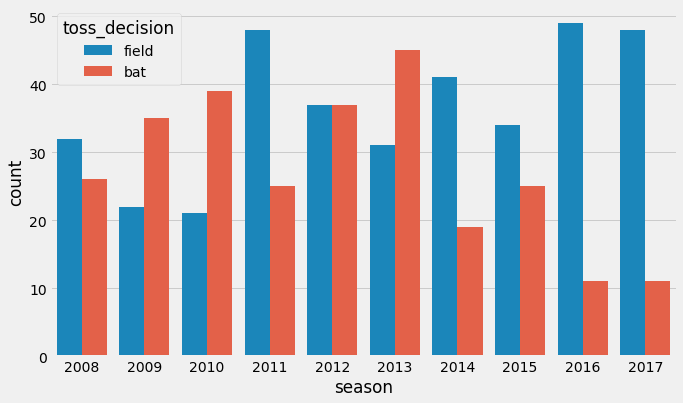

In [17]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

The decision for batting or fielding varies largely across the seasons. In some seasons, the probablity that toss winners opt for batting is high, while it is not the case in other seasons. After 2014 though, the majority of toss winners opted for fielding first.

### Maximum Toss Winners

Let's check which team has won the toss maximum number of times.

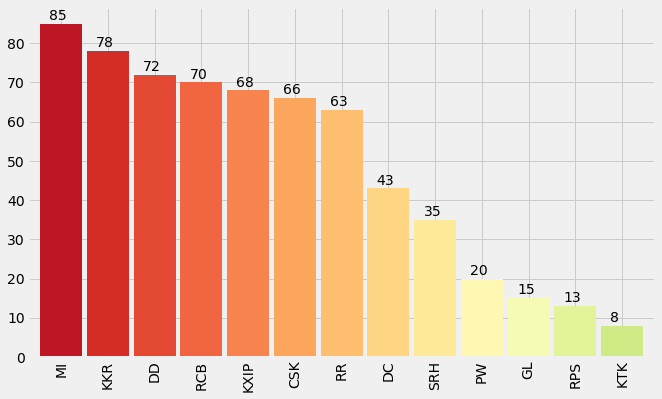

In [18]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.20, p.get_height()+1))
mlt.show()

Mumbai Indians seem to be very lucky having won the highest number of tosses followed by Kolkata Knight Riders. This does not show the higher chances of winning the toss as the number of matches played by each team is uneven.

### Total Matches vs Wins for Teams

In [19]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

### Is Toss Winner Also the Match Winner?

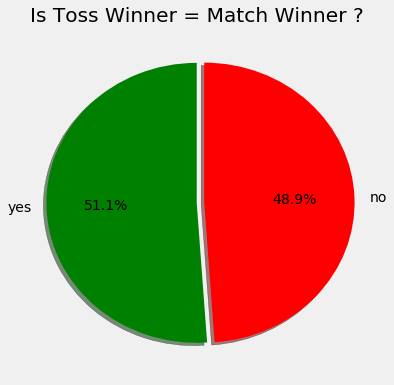

In [20]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(636-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['g','r'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.title('Is Toss Winner = Match Winner ?')
mlt.show()

Thus the toss winner is not necessarily the match winner.



### Matches played in each season

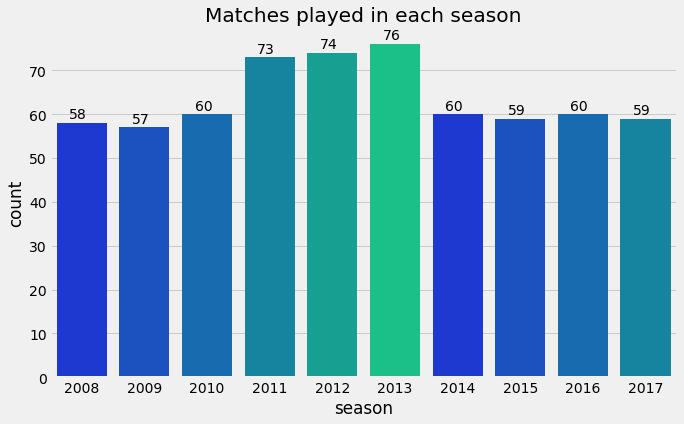

In [21]:
mlt.subplots(figsize=(10,6))
ax=sns.countplot(x='season',data=matches,palette=sns.color_palette('winter')) 
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.20, p.get_height()+1))
mlt.title('Matches played in each season')
mlt.show()



### Total runs scored across the Seasons

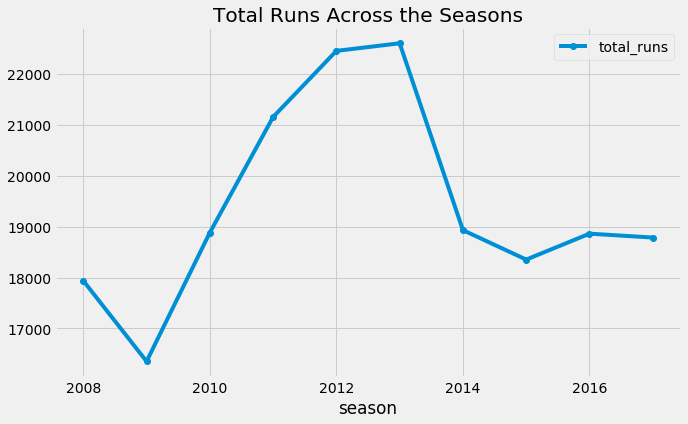

In [22]:


batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively.
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

There was a decline in total runs from 2008 to 2009.But there after there was a substantial increase in runs in every season until 2013, but from next season there was a slump in the total runs. But the number of matches are not equal in all seasons. We should check the average runs per match in each season.

### Average runs per match in each Season

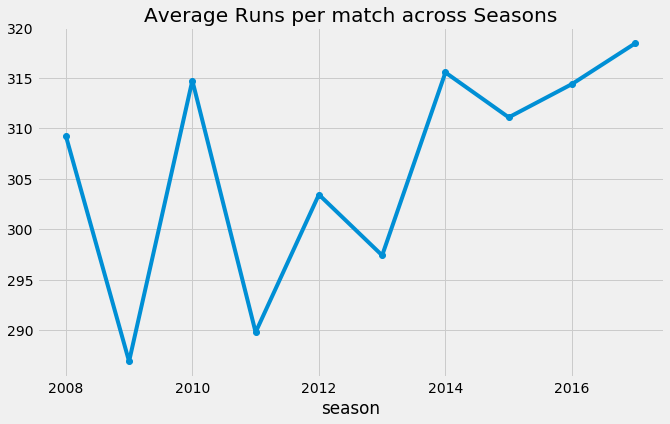

In [29]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()


### Sixes and Fours Across all Seasons

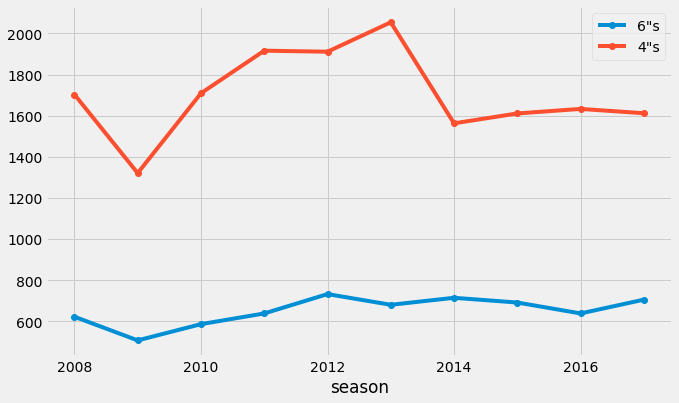

In [34]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

### Runs Per Over By Teams Across Seasons

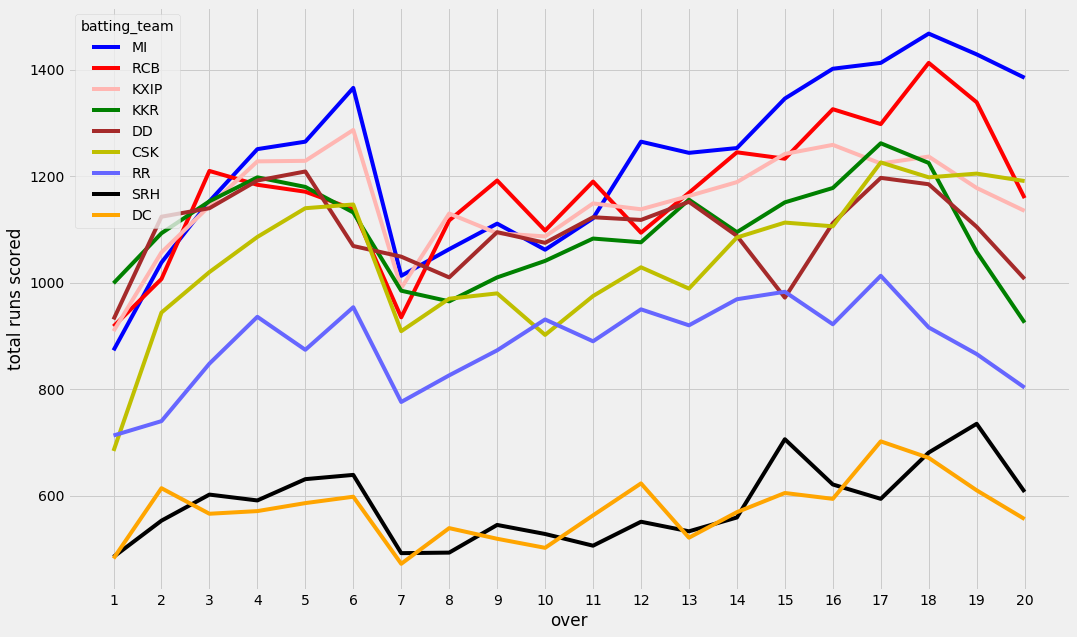

In [39]:
runs_per_over = delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 50 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mlt.xticks(x)
mlt.ylabel('total runs scored')
fig=mlt.gcf()
fig.set_size_inches(16,10)
mlt.show()

Maximum runs are being scored in the last 5 overs of the match. MI and RCB have shown a increasing trend in the runs scored throughout the match. DC,SRH and RR graphs are low because they haven't played all seasons of IPL.

### Stadium to host maximum matches

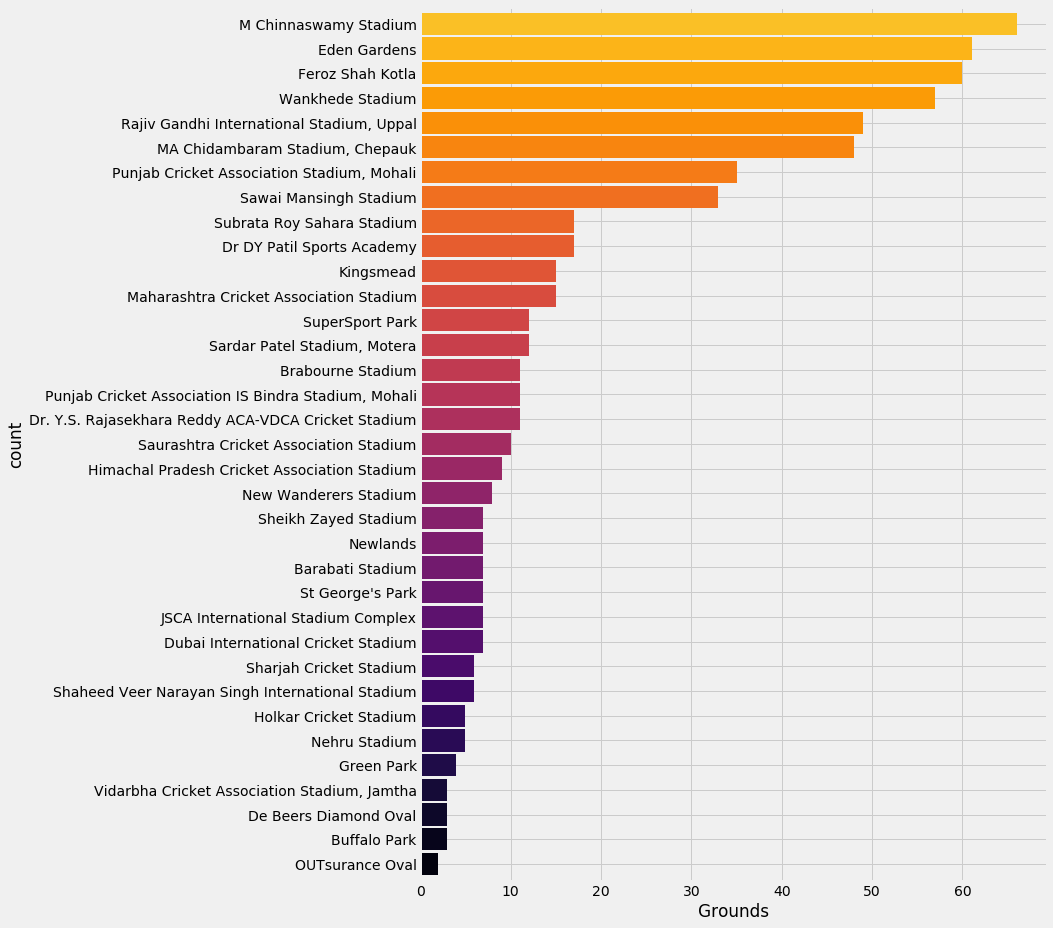

In [50]:
mlt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

M.Chinnaswamy Stadium,Bengaluru has hosted maximum number of matches.

### Maximum Man Of Matches

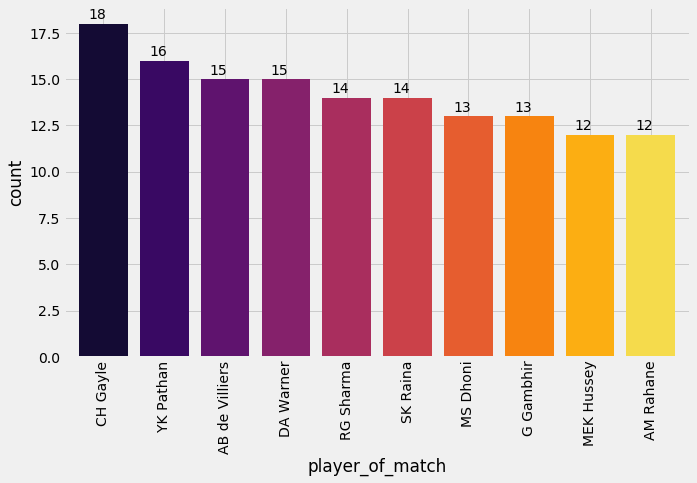

In [52]:
mlt.subplots(figsize=(10,6))
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

As we saw earlier, Chris Gayle has recieved maximum number of Man of the Match awards. 

### Winners by Year

In [56]:
print('Winners By Years')
for i in range(2008,2018):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']
[2017 'MI']


### Total Super Overs


In [57]:
print('\n Total Matches with Super Overs:',delivery[delivery['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


We had 7 Super Overs in IPL till 2017.

##### Okay! Now let's check which teams haven't played a super over  in IPL.

In [58]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=delivery[delivery['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['PW', 'RPS', 'KTK', 'DC']


### Most Experienced Umpires

Let's check which umpire has appeared i n most number of IPL matches.

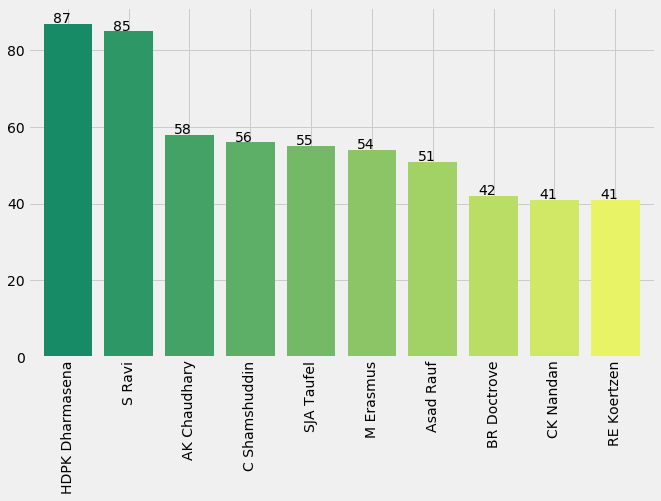

In [59]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

Kumara Dharmasena of Srilanka has appeared in most number of IPL matches (87).

### Team1 vs Team2

 Okay! now let's have some fun. Let's check how two teams have performed against each other. I'm going with the two classic teams who have played some epic matches against each other. CSK and MI.

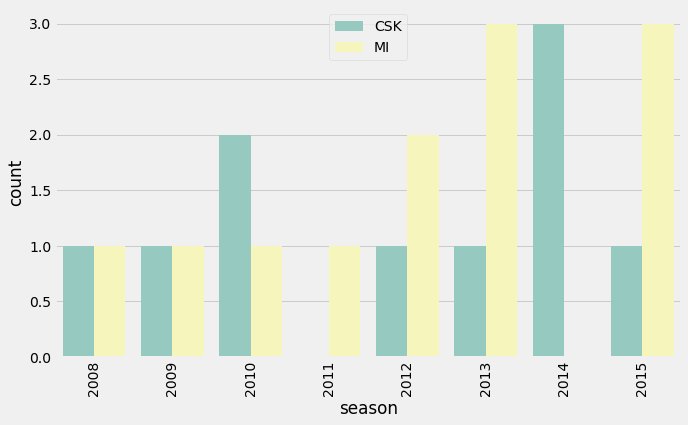

In [67]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    mlt.xticks(rotation='vertical')
    leg = mlt.legend( loc = 'upper center')
    fig=mlt.gcf()
    fig.set_size_inches(10,6)
    mlt.show()
team1_vs_team2('CSK','MI')

Here se can see that MI and CSK have played against each other in more than 2 matches in some seasons i.e they have played qualifiers too.

### Matches won by a team against other teams


Now we will be checking the number of times a Team has won against other teams. This will give us an idea as which team has an upper hand over the others when they play head-to-head. I'm checking for KKR vs all other teams.

In [72]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)
    
comparator('KKR')

        MI  KKR
winner  16    5
        KKR  RCB
winner   11    9
        KKR  DC
winner    7   2
        CSK  KKR
winner   10    6
        RR  KKR
winner   9    6
        KKR  DD
winner   12   7
        GL  KKR
winner   3    1
        KKR  KXIP
winner   14     7
        KKR  SRH
winner    8    4
        KKR  RPS
winner    3    1
        KTK
winner    2
        KKR  PW
winner    4   1


### Score Distribution For Teams by Innings

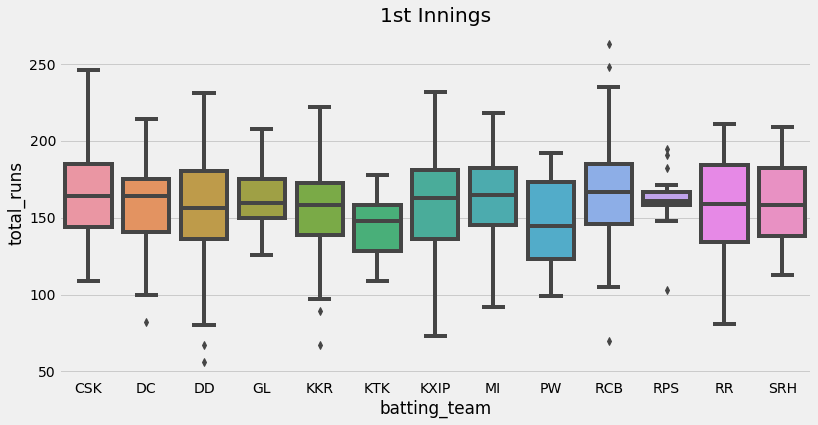

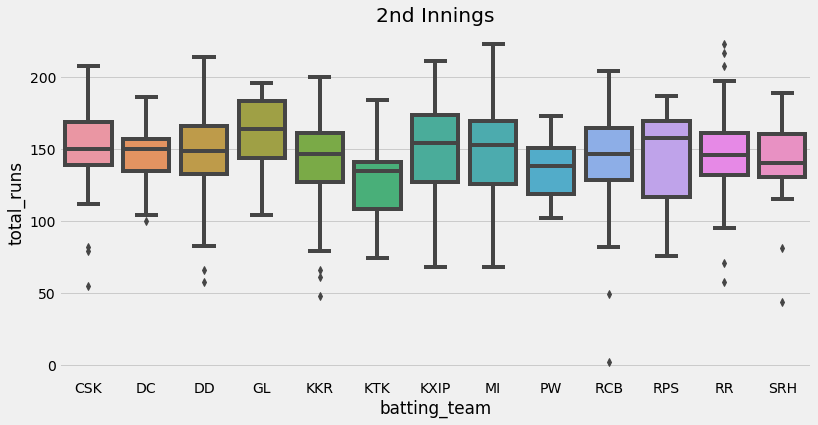

In [73]:
mlt.subplots(figsize=(12,6))
xyz=delivery.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
mlt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=mlt.gcf()
fig.set_size_inches(12,6)

According to Graph 1 the batting by CSK in innings 1 looks to be the best. Graph 2 also conveys the same story. Overall  CSK and RCB have scored well while batting first and again CSK,KXIP and MI have done well while chasing. 

### 200+ Scores

In [74]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


As we can see RCB dominates 200+ chart with 4 out of top 10 scores above 200.

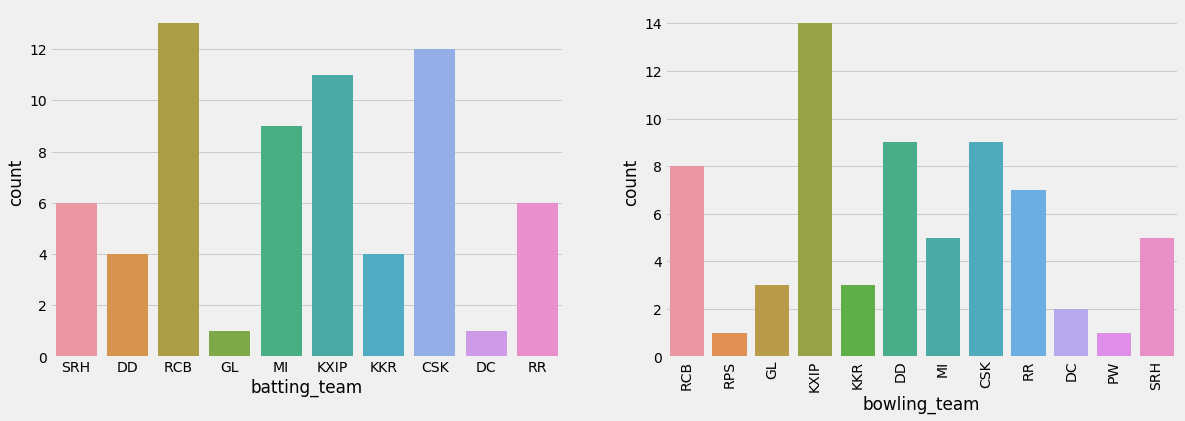

In [75]:
fig, ax =mlt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
mlt.xticks(rotation=90)
fig=mlt.gcf()
fig.set_size_inches(18,6)
mlt.show()

The graph on the left shows the number of times a team has scored above 200 runs. The graph on the right shows the number of times a bowling team has conceeded above 200 runs.

In [80]:
print("Teams who haven't ever scored 200 runs: ",list(set(teams)-set(high_scores['batting_team'])))
print("Teams who haven't conceeded over 200 while bowling: ",list(set(teams)-set(high_scores['bowling_team'])))

Teams who haven't ever scored 200 runs:  ['PW', 'RPS', 'KTK']
Teams who haven't conceeded over 200 while bowling:  ['KTK']


In [81]:
high=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high


count
inning batting_team bowling_team       
1      CSK          DD                1
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                1
                    SRH               2
       DC           RR                1
       DD           KXIP              1
                    MI                1
                    RPS               1
       GL           DD                1
       KKR          DC                1
                    KXIP              1
                    RCB               1
       KXIP         CSK               2
                    MI                1
                    RCB               2
                    RR                1
       MI           CSK               1
                    DD                4
                    RCB               1
                    RR                1
       RCB          CSK               1
                    DD                1
                    GL                2
                    KXIP              3
                    MI                1
                    PW                1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DD                1
                    KXIP              1
       SRH          KKR               1
                    KXIP              2
                    RCB               2
                    RR                1
2      CSK          KXIP              1
                    RCB               1
                    RR                1
       DD           GL                1
       KKR          KXIP              1
       KXIP         CSK               2
                    DD                1
                    KKR               1
                    SRH               1
       MI           CSK               1
                    KXIP              1
       RCB          KXIP              1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1

The above dataframe shows the number of times a team has scored above 200 runs against another team. Clearly MI has scored 200+ againt DD 3 times and similarly RCB has scored 200+ againt KXIP 3 times. Also the number of 200+ runs are higher in the 1st innings.

### Chances of chasing 200+ target

In [83]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,no
8,9,1,DD,RPS,205,2,108,no
19,20,1,RCB,GL,213,2,192,no
31,32,1,SRH,KXIP,207,2,181,no
35,36,1,SRH,KKR,209,2,161,no


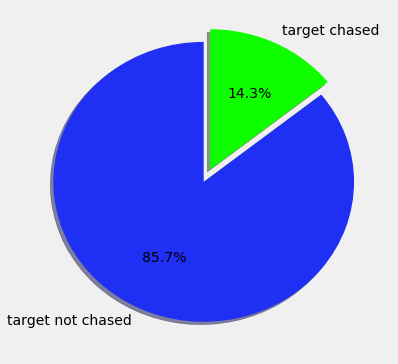

In [84]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['target not chased','target chased']
mlt.pie(slices,labels=labels,colors=['#1f2ff3', '#0fff00'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

It seems to be clear that team batting first and scoring 200+ runs, has a very high probablity of winning the match.



### Batsman Comparator

I have created a function that compares 2 batsman based on their respective stats like runs or strike rate etc. First lets create a dataframe from where we will be taking all that values for comparison.

In [86]:
balls=delivery.groupby(['batsman'])['ball'].count().reset_index()
runs=delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=delivery.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,DC,10
1,A Ashish Reddy,196,280,142.857143,16,15,SRH,36
2,A Chandila,7,4,57.142857,0,0,RR,4
3,A Chopra,75,53,70.666667,7,0,KKR,24
4,A Choudhary,20,25,125.000000,1,1,RCB,15


Now using this dataframe, we can compare stats like the strike rate, or the number of 6's for 4's etc. We will be passing the names of 2 batsmen and two comparing measures for the comparision.

In [92]:
def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team',size=8).map(mlt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    mlt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    mlt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,
            fontsize=10, weight='bold', color='#f46d43')
    mlt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    mlt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2, 
            fontsize=10, weight='bold', color='#ff58fd')
    mlt.gcf().set_size_inches(10,6)
    mlt.title('Batsman Comparator',size=25)
    mlt.show()



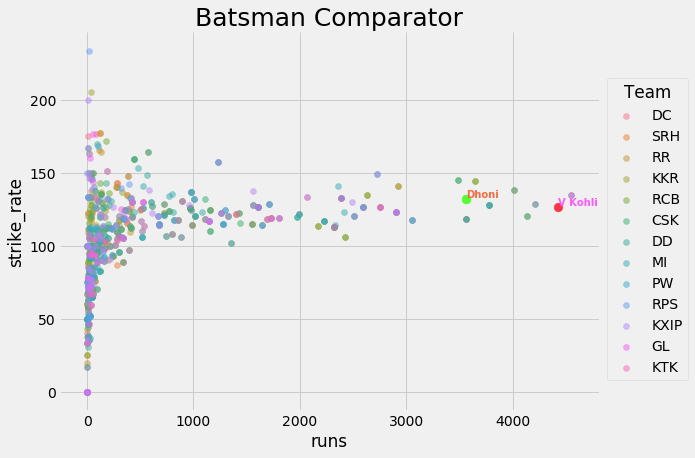

In [93]:
#Dhoni vs Kohli
batsman_comparator("runs","strike_rate",'Dhoni','V Kohli')


### Top 10 Batsmen

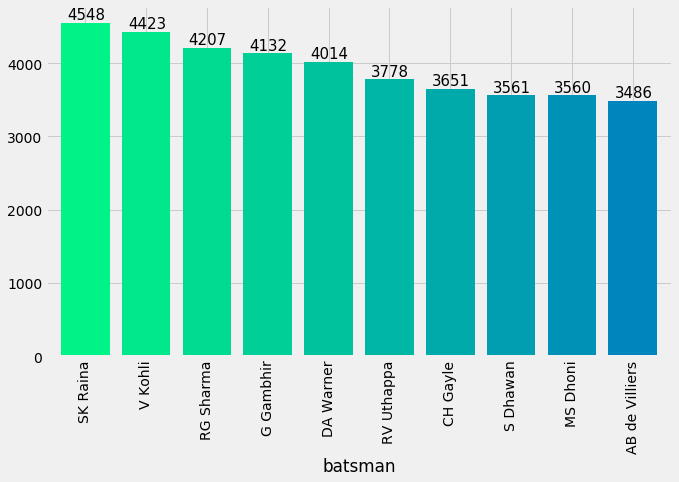

In [94]:
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()

Suresh raina has scored maximum number of runs followed by Virat kohli.

### Top Batsman's with 1's, 2's, 3's, 4's

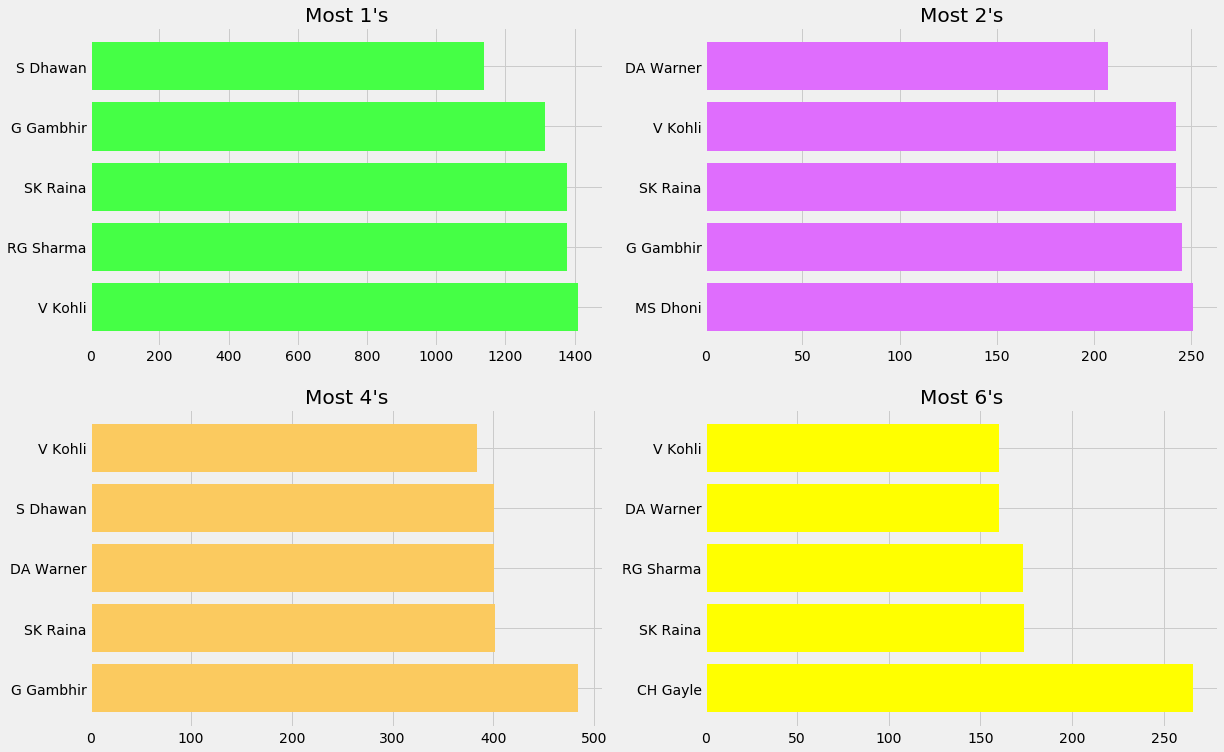

In [96]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=mlt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
mlt.show()

##### Observations:

Kohli has scored the maximum 1's.

Dhoni has the maximum 2's .

Gambhir has the maximum 4's.

C Gayle has the maximum 6's and he leads it by a big margin.

### Top Individual Scores

In [100]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs', ascending=0).head(20)
top_scores.nlargest(20,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


Here too the Jamaican leads the table. Not only Gayle but there are many RCB players on the top scores list.

### Individual Scores By Top Batsman each Innings

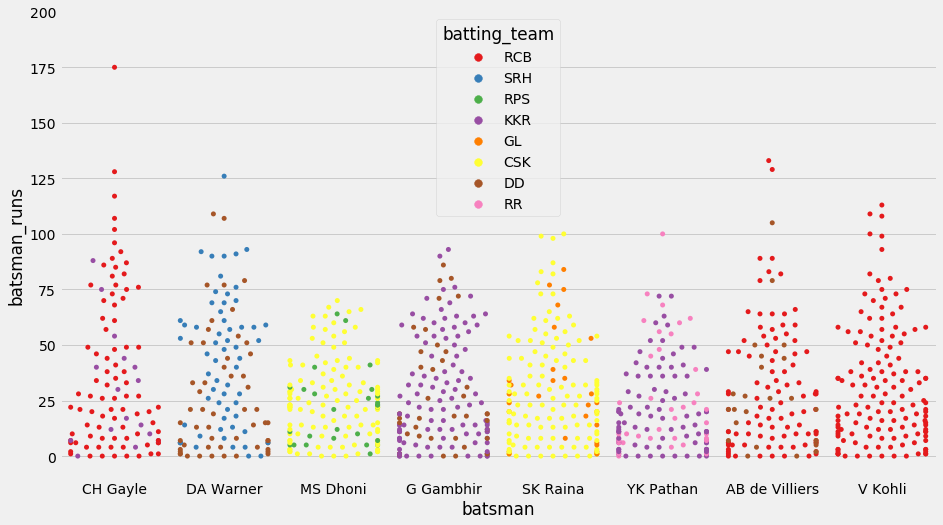

In [101]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=mlt.gcf()
fig.set_size_inches(14,8)
mlt.ylim(-10,200)
mlt.show()

##### Observations

Chris Gayle has the highest Individual Score of 175 and Highest Number of Centuries i.e 5.

MS Dhoni and Gautam Gambhir have never scored a Century.

V Kohli has played only for 1 IPL Team in all seasons i.e RCB.

### Runs Scored By Batsman Across Seasons

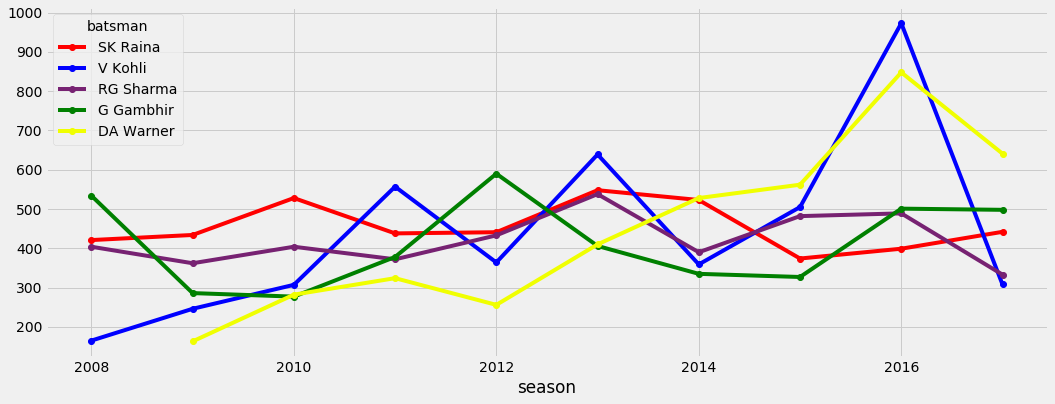

In [103]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=mlt.gcf()
fig.set_size_inches(16,6)
mlt.show()

David Warner's form looks to be improving season by season. Virat Kohli had crazy 2016 season where he scored mammoth 973 runs.

### How do the top batsmen score? ( Interactive graph )


In [104]:
a=batsmen.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
b=max_runs.sort_values(ascending=False)[:10].reset_index()
c=b.merge(a,left_on='batsman',right_on='batsman',how='left')
c.drop('batsman_runs_x',axis=1,inplace=True)
c.set_index('batsman',inplace=True)
c.columns=['type','count']
c=c[(c['type']==1)|(c['type']==2)|(c['type']==4)|(c['type']==6)]
cols=['type','count']
c.reset_index(inplace=True)
c=c.pivot('batsman','type','count')

trace1 = go.Bar(
    y=c.index, x=c[6],
    name="6's",
    orientation = 'h',
    marker = dict(color = 'rgba(178, 78, 139, 0.6)',
        line = dict(color = 'rgba(178, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=c.index, x=c[4],
    name="4's",
    orientation = 'h',
    marker = dict(color = 'rgba(58, 71, 80, 0.6)',
        line = dict(color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=c.index, x=c[2],
    name="2's",
    orientation = 'h',
    marker = dict(color = 'rgba(101, 178, 139, 0.6)',
        line = dict(color = 'rgba(101, 178, 139, 1.0)',
            width = 3)
    )
)
trace4 = go.Bar(
    y=c.index, x=c[1],
    name="1's",
    orientation = 'h',
    marker = dict(color = 'rgba(208, 105, 80, 0.6)',
        line = dict(color = 'rgba(208, 105, 80, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2,trace3,trace4]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')


### Frequency of Scores

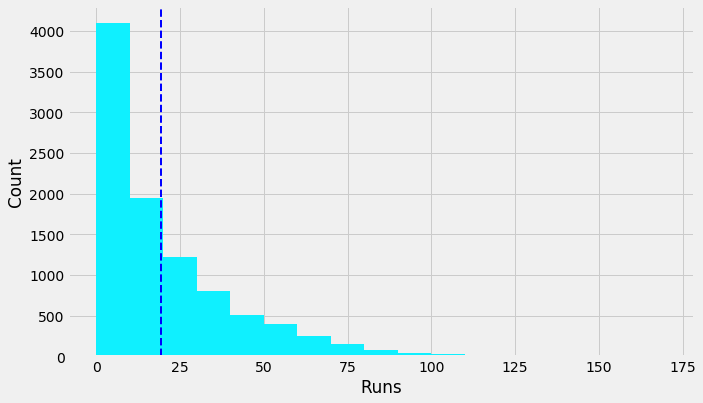

In [105]:
mlt.subplots(figsize=(10,6))
bins=range(0,180,10)
mlt.hist(top_scores["batsman_runs"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Runs')
mlt.ylabel('Count')
mlt.axvline(top_scores["batsman_runs"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

The average score for a batsman is around 19-20. Also the number of single digit score is quite high and the number of centuries is low.

### Orange Caps Each Season (Highest Run Getter per Season) (  Interactive graph )

In [106]:
orange=matches[['id','season']]
orange=orange.merge(delivery,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")
orange.sort_values(by='season')

trace1 = go.Bar(
    x=orange['season'].values,
    y=orange['batsman_runs'].values,
    name='Total Matches',
    text=orange['batsman'].values,
    marker=dict(
        color='rgb(255,140,0)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Orange-Cap Holders',
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')


### Top Bowlers

### Highest Wicket Takers 

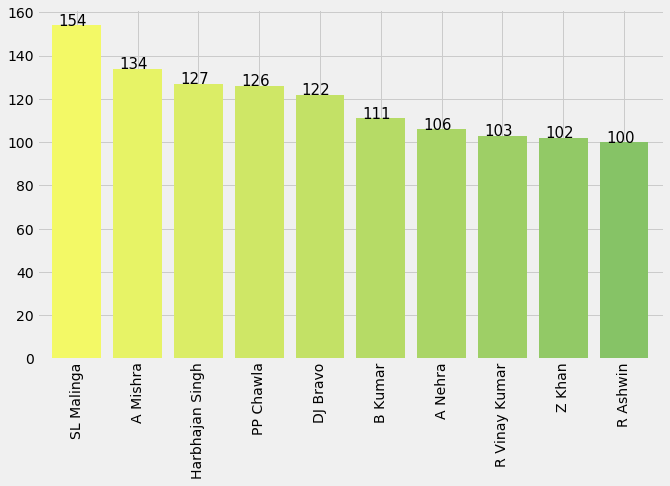

In [107]:
mlt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
mlt.show()

Lasith Malinga leads the chart, thanks to his unpredictable bowling action. Other bowlers have a very small wicket margin between them.

### Maximum Overs Bowled

In [108]:
eco=delivery.groupby(['bowler']).sum()
eco['total balls']=delivery['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,498
1,A Mishra,450
2,SL Malinga,449
3,P Kumar,439
4,PP Chawla,432


### Most Economical Bowlers with 300+ overs



In [110]:
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index()


,bowler,economy
0,SP Narine,6.395706
1,R Ashwin,6.493639
2,DW Steyn,6.615599
3,SL Malinga,6.757238
4,Harbhajan Singh,6.933735
5,B Kumar,7.046784
6,A Mishra,7.344444
7,PP Ojha,7.404321
8,Z Khan,7.546174
9,P Kumar,7.612756


### Top 20 Bowlers (Interactive graph)

In [111]:
bowlers=delivery.groupby('bowler').sum().reset_index()
bowl=delivery['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts()[:20].reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers['economy']=(bowlers['runs_given']/bowlers['overs'])
bowlers.head()

,bowler,runs_given,overs,wickets,economy
5,A Mishra,3305,450,134.0,7.344444
7,A Nehra,2537,329,106.0,7.711246
50,B Kumar,2410,342,111.0,7.046784
88,DJ Bravo,2815,351,122.0,8.019943
103,DW Steyn,2375,359,92.0,6.615599


In [112]:
trace = go.Scatter(
    y = bowlers['wickets'],
    x = bowlers['bowler'],
    mode='markers',
    marker=dict(
        size= bowlers['wickets'].values,
        color = bowlers['economy'].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'Economy'),
    ),
    text = bowlers['overs'].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Top 20 Wicket Taking Bowlers',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Bowlers'
    ),
    yaxis=dict(
        title= 'Wickets Taken',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

### Highest Dismissals for a Batsman by a Bowler

In [115]:
gayle=delivery[delivery['batsman']=='CH Gayle']
gayle=gayle[gayle['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
gayle=gayle.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
gayle['batsman']='CH Gayle'

kohli=delivery[delivery['batsman']=='V Kohli']
kohli=kohli[kohli['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
kohli=kohli.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
kohli['batsman']='V Kohli'


raina=delivery[delivery['batsman']=='SK Raina']
raina=raina[raina['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
raina=raina.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
raina['batsman']='SK Raina'

abd=delivery[delivery['batsman']=='AB de Villiers']
abd=abd[abd['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
abd=abd.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
abd['batsman']='AB de Villiers'

msd=delivery[delivery['batsman']=='MS Dhoni']
msd=msd[msd['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
msd=msd.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
msd['batsman']='MS Dhoni'


gg=delivery[delivery['batsman']=='G Gambhir']
gg=gg[gg['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
gg=gg.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
gg['batsman']='G Gambhir'

rohit=delivery[delivery['batsman']=='RG Sharma']
rohit=rohit[rohit['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
rohit=rohit.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
rohit['batsman']='RG Sharma'

uthapa=delivery[delivery['batsman']=='RV Uthappa']
uthapa=uthapa[uthapa['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
uthapa=uthapa.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
uthapa['batsman']='RV Uthappa'

dhawan=delivery[delivery['batsman']=='S Dhawan']
dhawan=dhawan[dhawan['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
dhawan=dhawan.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
dhawan['batsman']='S Dhawan'

warn=delivery[delivery['batsman']=='DA Warner']
warn=warn[warn['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
warn=warn.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
warn['batsman']='DA Warner'

new = gayle.append([kohli,raina,abd,msd,gg,rohit,uthapa,dhawan,warn])
new = new[['batsman','bowler','dismissal_kind']]
new.columns=['batsman','bowler','No_of_Dismissals']
new.sort_values('No_of_Dismissals',ascending=False,inplace=True)
new

,batsman,bowler,No_of_Dismissals
0,MS Dhoni,Z Khan,7
0,V Kohli,A Nehra,6
0,G Gambhir,Z Khan,6
0,RG Sharma,R Vinay Kumar,6
0,SK Raina,Harbhajan Singh,5
0,CH Gayle,R Ashwin,4
0,AB de Villiers,KH Pandya,4
0,RV Uthappa,A Mishra,4
0,S Dhawan,Z Khan,4
0,DA Warner,L Balaji,3


### Frequency Of Economy

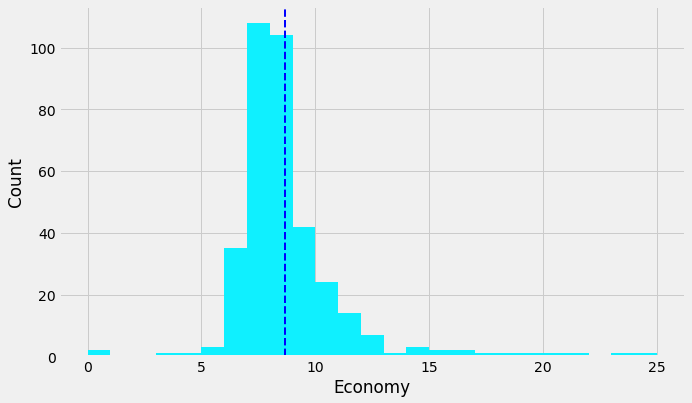

In [116]:
mlt.subplots(figsize=(10,6))
eco.replace([np.inf, -np.inf], np.nan,inplace=True)
eco.fillna(0,inplace=True)
bins=range(0,26)
mlt.hist(eco['economy'],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Economy')
mlt.ylabel('Count')
mlt.axvline(eco["economy"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

The average economy rate is between 8.5-9.

### Purple Caps Each Season (Maximum Wickets By Bowler per Season) ( Interactive graph )


In [117]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
purple=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
purple=purple.merge(matches,left_on='match_id',right_on='id',how='outer')
purple=purple.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple=purple.sort_values('dismissal_kind',ascending=False)
purple=purple.drop_duplicates('season',keep='first').sort_values(by='season')
purple.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)

trace1 = go.Bar(
    x=purple['season'].values,
    y=purple['count_wickets'].values,
    name='Total Matches',
    text=purple['bowler'].values,
    marker=dict(
        color='rgb(75,0,130)',
        line=dict(
            color='rgb(108,148,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Purple-Cap Holders',
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

### Teams with maximum Boundaries (Interactive graph)


In [119]:
ax=delivery[delivery['batsman_runs']==6].batting_team.value_counts().reset_index()
ax2=delivery[delivery['batsman_runs']==4].batting_team.value_counts().reset_index()
ax=ax.merge(ax2,left_on='index',right_on='index',how='left')
ax.rename({'index':'team','batting_team_x':"6's",'batting_team_y':"4's"},axis=1,inplace=True)

trace1 = go.Bar(
    x=ax.team.values, y=ax["6's"],
    name="6's",
    orientation = 'v',
    marker = dict(color = 'rgba(204,12,28, 0.6)',
        line = dict(color = 'rgba(204,12,28, 0.6)',
            width = 3)
    )
)
trace2 = go.Bar(
    x=ax.team.values, y=ax["4's"],
    name="4's",
    orientation = 'v',
    marker = dict(color = 'rgba(9,234,227, 0.6)',
        line = dict(color = 'rgba(9, 227, 227, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

RCB-RCB everywhere. Here too RCB leads with a big margin. RCB has hit maximum number of sixes thanks to the trio of Gayle,ABD and Virat.

### How to win Finals??

Okay! we are into the last section of analysis now.First let us see which teams have played and won the maximum finals.

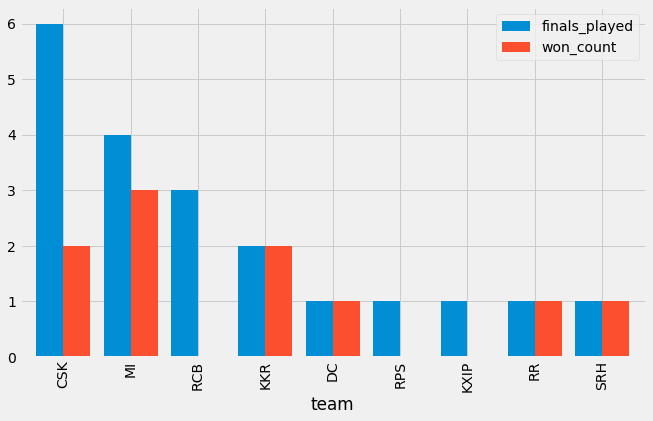

In [120]:
finals=matches.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
mlt.gcf().set_size_inches(10,6)
mlt.show()

Wooh!! CSK has played 6 IPL finals(but could win only 2),followed by RCB with 3. CSK,MI,KKR have all won 2 titles each. Sadly RCB have never won a final even with 3 apperances.

Looking at the graph we can say that next year too CSK has a high chance of featuring in the finals as it has featured in 6 out of their 8 seasons played.

### Do Toss Winners Win Finals??

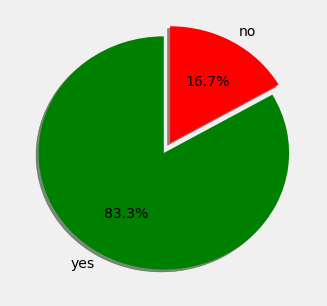

In [121]:
df=finals[finals['toss_winner']==finals['winner']]
slices=[len(finals),(9-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,colors=['G','R'],explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(5,5)
mlt.show()

83.3%!!! chances is that the toss winning team wins the title. Thats a huge number and thus indication that winning the toss plays a great role in winning the match!!

### Batting Or Fielding For Toss Winners?

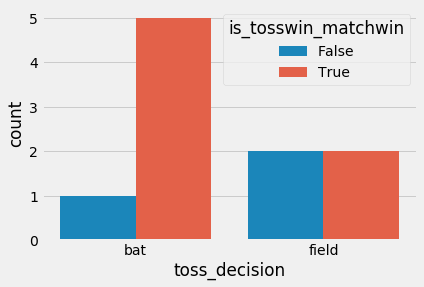

In [122]:
finals['is_tosswin_matchwin']=finals['toss_winner']==finals['winner']
sns.countplot(x='toss_decision',hue='is_tosswin_matchwin',data=finals)
mlt.show()

Looks like after Winning The Toss team should opt for Batting as we can see that batting has proved to be match winning decision for 4/5 times out of 9 finals.

#### I will keep updating the notebook whenever possible.

#### Thank You for having a look at this Notebook.